<a href="https://colab.research.google.com/github/aakhterov/ML_algorithms_from_scratch/blob/master/data_science_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task #1. 7-Sided Die Roll

**Problem**

Write a function that simulates a 7-sided die roll using a 6-sided die. You will need to show that the outcomes of the 7-sided die from your function are equally likely by generating a simulation with 10,000 trials of the function call.

Output a list of proportions with the first element array representing side 1 and the last element representing side 7. Round the proportions to three decimal places.

You may use the random.randint(1, 6) from the random library to roll a 6-sided die, but do not use random.randint(1, 7).

In [18]:
import random

In [ ]:
# Set the random seed
random.seed(123)

# Input:
k = 10_000 # 10,000 trials of the function that simulates a 7-sided die

# Output: [0.137, 0.146, 0.144, 0.146, 0.138, 0.142, 0.148]

In [15]:
def simulate_7_side_dice(k: int) -> list:
  '''
  Simulate 7-sided dice using 6-sided dice. The idea that we're going to count every 7th outcome of every side of 6-sided dice as the 7th side outcome

  Parameters:
    k - trials of the function that simulates a 7-sided die

  Return:
    a list of proportions with the first element array representing side 1 and the last element representing side 7.
  '''
  # dictionary for counting the outcomes of every side. If we have 6 outcomes of any side we count this rolling as the 7th side outcome
  sides_counter = {i: 0 for i in range(1, 7)}
  # dictionary for counting the total number of the outcomes of the every side.
  tosses = {i: 0 for i in range(1, 8)}

  for _ in range(k):
    # roll dice
    toss = random.randint(1, 6)
    if sides_counter[toss] == 6:
      tosses[7] += 1
      sides_counter[toss] = 0
    else:
      tosses[toss] += 1
      sides_counter[toss] += 1

  return [round(v/k, 3) for v in tosses.values()]

In [17]:
simulate_7_side_dice(k)

[0.141, 0.139, 0.139, 0.146, 0.148, 0.144, 0.143]

# Task #2. Confidence Interval

**Problem**

What does the 95% confidence interval mean? Suppose that the distribution of a population is normal with a mean of 100 and standard deviation of 10. How would you write a simulation that demonstrates that the 95% confidence interval of the mean contains the true mean about 95% of the time?

You may use the following code to get started.

In [1]:
# Import libraries
import numpy as np
import scipy.stats as sci

# Set the random seed
np.random.seed(111)

In [10]:
pop_mean = 100
pop_std = 10
sample_size = 100
num_samples = 10_000
alpha = 0.05

In [11]:
inside_ci_count = 0
for _ in range(num_samples):
  sample = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size) # generate the sample from the normal distribution
  sample_mean = np.mean(sample) # calculate the sample mean
  sample_std_error = sci.sem(sample, ddof=0) # calculate standard sample error = np.std(sample)/np.sqrt(n)
  upper, lower = sci.t.interval(confidence=1-alpha, df=sample_size-1, loc=sample_mean, scale=sample_std_error) # get the CI bounds for the sample
  inside_ci_count += upper < pop_mean < lower # if the population mean inside th CI then increment counter

print(f"Percent of times the population mean is inside of samples CI {inside_ci_count/num_samples:.0%}")

Percent of times the population mean is inside of samples CI 95%


# Task #3 Central Limit Theorem

**Problem**

Write a code that simulates the Central Limit Theorem (CLT). What does CLT mean?

Using Numpy, how would you simulate CLT from any population distribution of your choice? <br>

You may use the following code to get started on the problem.

Bonus point if you can plot a histogram of the distribution that demonstrates the Central Limit Theorem.

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(123)

In [29]:
sample_size = 1000
num_samples = 100_000

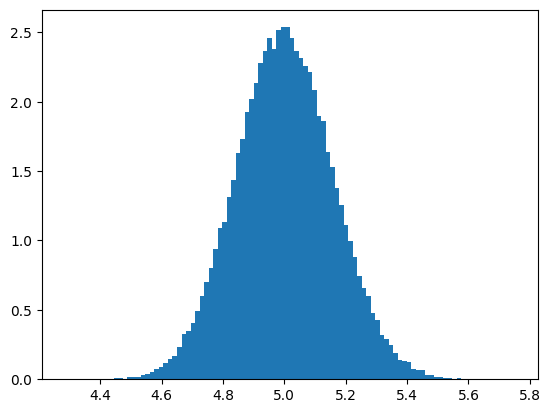

In [34]:
means = [np.mean(np.random.exponential(scale=5, size=sample_size)) for _ in range(num_samples)]
plt.hist(x=means, bins=100, density=True)
plt.show()

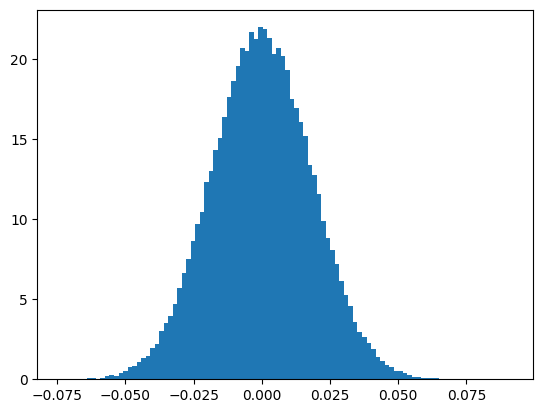

In [35]:
means = [np.mean(np.random.uniform(low=-1, high=1, size=sample_size)) for _ in range(num_samples)]
plt.hist(x=means, bins=100, density=True)
plt.show()